In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D

# Question 1: Discrete Fourier Transform (30 marks)
The goal of this problem is to use DFT and understand the roles of magnitude and phase
components of an image in the frequency domain (Helpful functions: np.fft.fft2, np.fft.ifft2,
np.fft.fftshift, np.fft.ifftshift, np.abs, np.angle, real, mesh)

a) (5 marks) Read both the images, basketball.jpg and soccer.jpg, and convert them to
grayscale. Display both the colored and the corresponding gray-scale images in a 2x2
grid.

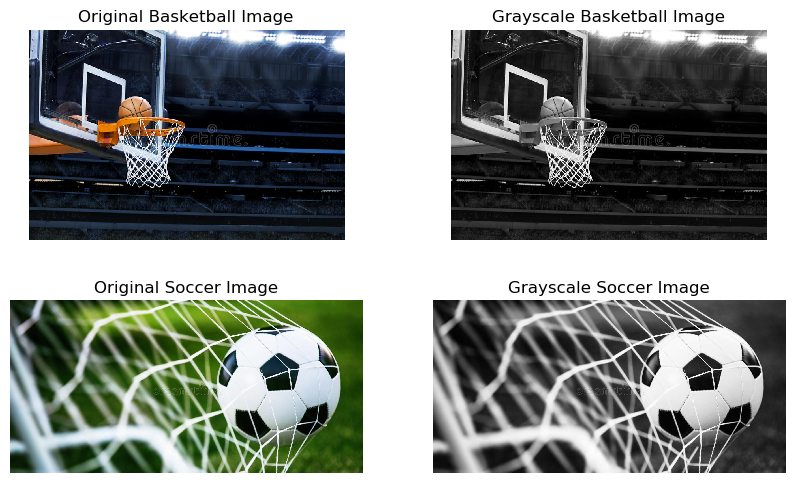

In [66]:
def grayscale(img, weights=[1/3, 1/3, 1/3]):
    gray = np.zeros((img.shape[0], img.shape[1]))
    gray[:] = weights[0] * img[:, :, 0] + weights[1] * img[:, :, 1] + weights[2] * img[:, :, 2]
    gray[:] = weights[0] * img[:, :, 0] + weights[1] * img[:, :, 1] + weights[2] * img[:, :, 2]
    gray[:] = weights[0] * img[:, :, 0] + weights[1] * img[:, :, 1] + weights[2] * img[:, :, 2]
    return gray

basketball = mpimg.imread('images/q1_basketball.jpg')
soccer = mpimg.imread('images/q1_soccer.jpg')
g_basketball= grayscale(img=basketball)
g_soccer = grayscale(img=soccer)

fig = plt.figure(figsize=(10, 6))
ax = []
for i in range(4):
    ax.append(fig.add_subplot(2,2,i+1))
    ax[i].axis('off') 
ax[0].title.set_text('Original Basketball Image')
ax[1].title.set_text('Grayscale Basketball Image')
ax[2].title.set_text('Original Soccer Image')
ax[3].title.set_text('Grayscale Soccer Image')
ax[0].imshow(basketball)
ax[1].imshow(g_basketball, cmap='gray')
ax[2].imshow(soccer)
ax[3].imshow(g_soccer, cmap='gray')
plt.show()

b) (5 marks) Compute the DFT of the gray-scale version of basketball.jpg. Calculate the
DFT phase component and the logarithm of the DFT magnitude component, and perform
full-scale contrast stretch (FSCS) on both these components. Show the results side by
side. Please move the low frequency part to the center (helpful functions: np.fft.fft2,
np.fft.fftshift).

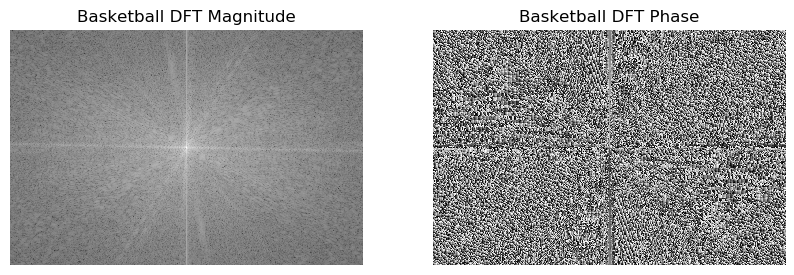

In [67]:
def func_fscs(img):
    A = np.amin(img)
    B = np.amax(img)
    P = (256 - 1) / (B - A)
    L = -A * (256 - 1) / (B - A)
    rows = img.shape[0]
    cols = img.shape[1]
    fscs_img = img.copy()
    for i in range(rows):
        for j in range(cols):
            fscs_img[i][j] = P * fscs_img[i][j] + L
    return fscs_img

dft = np.fft.fft2(g_basketball)
dft_mag = np.abs(dft)
dft_phase = np.angle(dft)
mag = func_fscs(np.fft.fftshift(np.log(dft_mag)))
phase = func_fscs(np.fft.fftshift(dft_phase))

fig = plt.figure(figsize=(10, 3.5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.axis('off')
ax2.axis('off')
ax1.title.set_text('Basketball DFT Magnitude')
ax2.title.set_text('Basketball DFT Phase')
ax1.imshow(mag, cmap='gray')
ax2.imshow(phase, cmap='gray')
plt.show()

c) (5 marks) Add “π” to the original DFT phase component of the gray-scale version of
basketball.jpg. Perform the inverse DFT to reconstruct the image using the modified DFT
phase (after adding “π”) and the original DFT magnitude components (use the
components before FSCS). Show the original and the reconstructed scotland.jpg (**I'm guessing this is supposed to be basketball.jpg**) side by
side. Can you explain the result mathematically? (Hint: Keep only the real part of the
inverse DFT, because the imaginary parts may be generated due to rounding errors.)

**Answer:** The resultant reconstructed image has the intensities of the original image inverted. This makes sense since the phase of an image tells us information about the structure of the image so multiplying each phase by a factor of e^sqrt(pi) = -1 causes each amplitude to be placed on the opposite end of the period relative to the center.

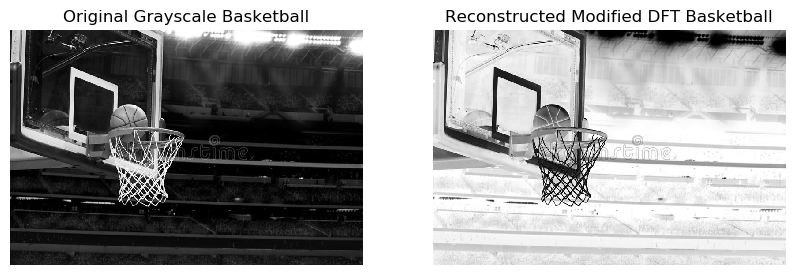

In [68]:
def reconstruct(dft_mag, dft_phase):
    dft = np.multiply(dft_mag, np.exp(1j * dft_phase))
    return np.fft.ifft2(dft)

modified_dft_phase = dft_phase + np.pi
reconstructed = reconstruct(dft_mag, modified_dft_phase)

fig = plt.figure(figsize=(10, 3.5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.axis('off')
ax2.axis('off')
ax1.title.set_text('Original Grayscale Basketball')
ax2.title.set_text('Reconstructed Modified DFT Basketball')
ax1.imshow(g_basketball, cmap='gray')
ax2.imshow(np.real(reconstructed), cmap='gray')
plt.show()

d) (5 marks) Increase the original DFT magnitude component of the gray-scale version of
basketball.jpg to the following powers: 1.5 and 0.3. Perform the inverse DFT to
reconstruct the image using the modified DFT magnitude and the original DFT phase
components (before the FSCS). Show the two reconstructed images and the original
image in a 1x3 grid. Can you explain the effects you observe after the exponentiation
operation? (helpful function: mesh).

**Answer:** Exponentiating the DFT magnitudes causes the intensities of the image to be raised to the respective powers. As such, for the 1.5 power case we see a sort of bloom effect where the light intensity is accentuated, while for the 0.3 power case we see the intensities all being brought down and close to the same level (resulting in the image lacking contrast).

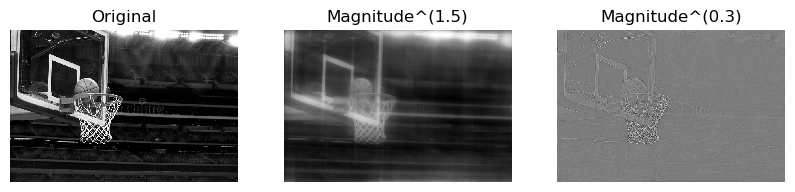

In [69]:
modified_dft_mag_1 = dft_mag ** 1.5
modified_dft_mag_2 = dft_mag ** 0.3
reconstructed_1 = reconstruct(modified_dft_mag_1, dft_phase)
reconstructed_2 = reconstruct(modified_dft_mag_2, dft_phase)

fig = plt.figure(figsize=(10, 2))
im1 = fig.add_subplot(1,3,1)
im2 = fig.add_subplot(1,3,2)
im3 = fig.add_subplot(1,3,3)
im1.axis('off')
im2.axis('off')
im3.axis('off')
im1.title.set_text('Original')
im2.title.set_text('Magnitude^(1.5)')
im3.title.set_text('Magnitude^(0.3)')
im1.imshow(g_basketball, cmap='gray')
im2.imshow(np.real(reconstructed_1), cmap='gray')
im3.imshow(np.real(reconstructed_2), cmap='gray')
plt.show()

e) (5 marks) Truncate the shifted DFT component of the gray-scale version of
basketball.jpg by a truncation window (you can determine the size and shape) to keep
~25%, ~12.5%, and ~6.25% of the DFT coefficients in center. Perform the inverse DFT
to reconstruct the image using the modified DFT (remember to undo the FSCS if
required). Show the original and the three reconstructed basketball.jpg images in a 2x2
grid with the appropriate labels. (Hint: Keep only the real part of the inverse DFT,
because the imaginary parts may be generated due to rounding errors.)

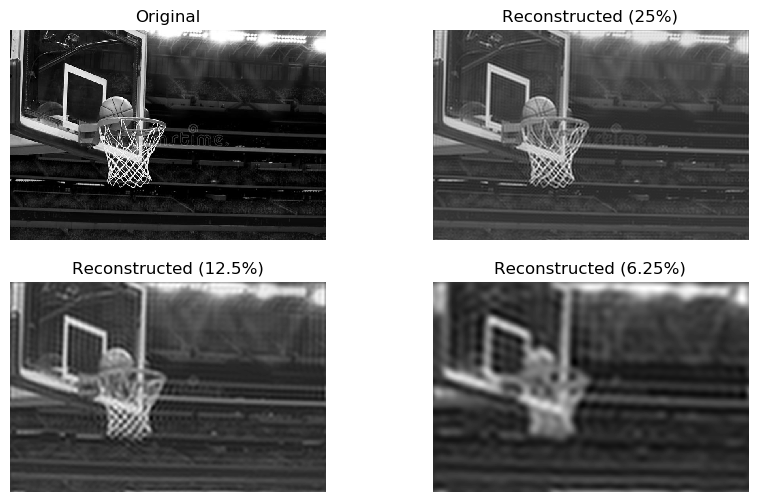

In [70]:
def truncate(img, fraction_to_keep):
    rows, cols = img.shape
    window_height = fraction_to_keep * rows
    window_width = fraction_to_keep * cols
    square_window = np.zeros((rows, cols))
    for i in range(int((rows - window_height) / 2), int((rows + window_height) / 2)):
        for j in range(int((cols - window_width) / 2), int((cols + window_width) / 2)):
            square_window[i][j] = 1
    return np.multiply(img, square_window)

centered_dft = np.fft.fftshift(dft)
truncated_25 = truncate(centered_dft, 0.25)
truncated_12_5 = truncate(centered_dft, 0.125)
truncated_6_25 = truncate(centered_dft, 0.0625)
reconstructed_25 = np.fft.ifft2(np.fft.ifftshift(truncated_25))
reconstructed_12_5 = np.fft.ifft2(np.fft.ifftshift(truncated_12_5))
reconstructed_6_25 = np.fft.ifft2(np.fft.ifftshift(truncated_6_25))

fig = plt.figure(figsize=(10, 6))
ax = []
for i in range(4):
    ax.append(fig.add_subplot(2,2,i+1))
    ax[i].axis('off') 
ax[0].title.set_text('Original')
ax[1].title.set_text('Reconstructed (25%)')
ax[2].title.set_text('Reconstructed (12.5%)')
ax[3].title.set_text('Reconstructed (6.25%)')
ax[0].imshow(g_basketball, cmap='gray')
ax[1].imshow(np.real(reconstructed_25), cmap='gray')
ax[2].imshow(np.real(reconstructed_12_5), cmap='gray')
ax[3].imshow(np.real(reconstructed_6_25), cmap='gray')
plt.show()

f) (5 marks) Let the original DFT magnitude component of the gray-scale version of
basketball.jpg be the same, and replace its DFT phase component with that of the
gray-scale version of soccer.jpg. Perform the inverse DFT to reconstruct this phase-off
image. Show the resulting image, with full-scale contrast stretch if necessary, and the
original basketball.jpg image side by side. Write a few lines about what you observe,
regarding what information the magnitude and phase components carry in the frequency
domain.

**Answer:** The DFT phase component contributes most to the structural description of the image, while the magnitude describes the intensities over different frequencies. This is why when we reconstruct the image with the phase of soccer.jpg (note that it is cropped to match the size of the DFT of basketball.jpg), we see the net of the goal from soccer.jpg and most if not all structural information from basketball.jpg is lost. If we were to use soccer.jpg's image size we would be able to make out the structure of the entire soccer.jpg image.

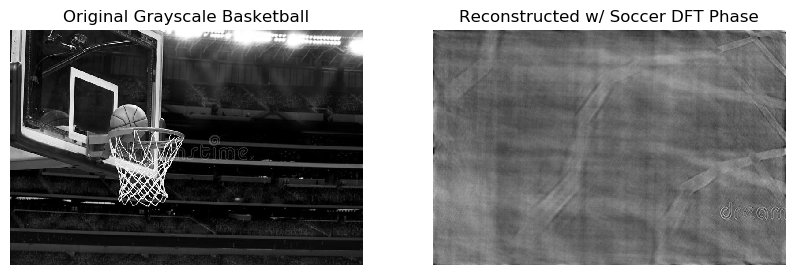

In [71]:
soccer_dft = np.fft.fft2(g_soccer, g_basketball.shape)
soccer_dft_phase = np.angle(soccer_dft)
reconstructed = reconstruct(dft_mag, soccer_dft_phase)

fig = plt.figure(figsize=(10, 3.5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.axis('off')
ax2.axis('off')
ax1.title.set_text('Original Grayscale Basketball')
ax2.title.set_text('Reconstructed w/ Soccer DFT Phase')
ax1.imshow(g_basketball, cmap='gray')
ax2.imshow(np.real(reconstructed), cmap='gray')
plt.show()

# Question 2: Linear and Non-Linear Image Filtering (45 marks)
The goal of this problem is to understand some types of image noise, and compare linear and
non-linear image filtering. (Useful functions: getGaussianKernel, filter2D, median,
np.random.normal, np.random.randint)

a) (10 marks) You need to write a function, “myAvgFilter()”. The function will have the
parameters as follows: myAvgFilter(image, window_size). The function should
implement the average filtering on an image with square windows (helpful function:
filter2D).

In [72]:
def myAvgFilter(img, window_size):
    kernel = np.ones((window_size, window_size), np.float32) / (window_size ** 2)
    return cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

b) (10 marks) You need to write a function, “myMedFilter()”. The function will have the
parameters as follows: myMedFilter(image, window_size). The function should
implement the median filtering on an image with square windows (helpful function:
median).

In [73]:
def myMedFilter(img, window_size):
    rows = img.shape[0]
    cols = img.shape[1]
    padded = np.pad(array=img, pad_width=int(window_size / 2), mode='constant')
    windows = np.lib.stride_tricks.sliding_window_view(padded, (window_size, window_size)) 
    return np.median(windows.reshape(rows, cols, 1, window_size * window_size), axis=3).reshape(rows, cols)

c) (10 marks) You need to write a function, “myGauFilter()”. The function will have the
parameters as follows: myGauFilter(image, window_size, sigma). The function should
implement the Gaussian filtering on an image with different window sizes and σ
(standard deviation) (helpful function: getGaussianKernel).

In [74]:
def myGauFilter(img, window_size, sigma):
    kernel = cv2.getGaussianKernel(window_size, sigma)
    kernel = kernel * np.transpose(kernel)
    return cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

d) (5 marks) Read the image, goat.jpg, and convert it into gray-scale. Add 5%
salt-and-pepper noise to the image. This means on an average, 2.5% of the pixels are
changed to 255 and 2.5% of the pixels are changed to 0 (helpful function:
np.random.randint). Apply the three different filters you implement above to the noisy
image. Show the noisy image and the best de-noised results from the three filters in
terms of MSE (Mean Squared Error) in a 2x2 grid (with appropriate labels), and report
both the resulting MSE and the parameters you picked for each filter. Write a few lines
explaining the results and why the filter that works best does so.

**Answer:** MSEs are reported in the label for each image. Each filter was using a 3x3 window and the value of sigma for the gaussian filter is 1. Using higher window sizes decreased the amount of noise at the cost of blurring two much, and after some experimentation 3x3 seemed the best (especially for the median filter). The median filter had the best MSE, and the results make sense since the salt-and-pepper noise adds extreme values which will most likely be cut off by the median filter (while extreme values still significantly contribute to average and gaussian filter kernels)

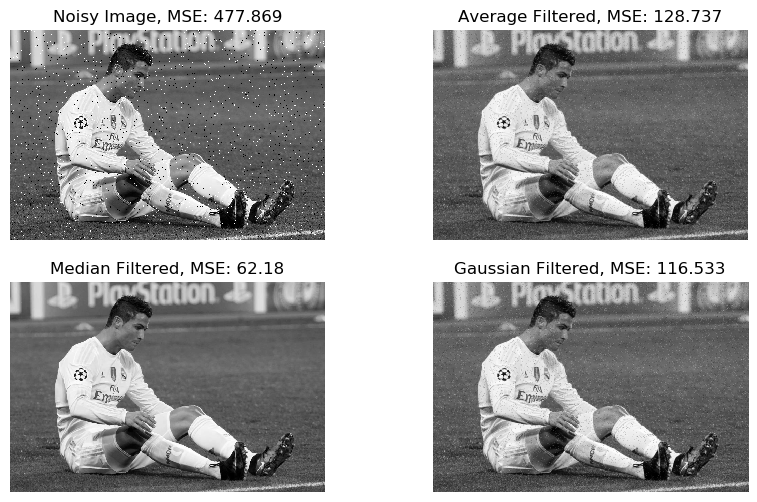

In [75]:
def snp_noise(img, fraction):
    upper_bound = (1 / (fraction / 2)) + 1
    salt = ((np.random.randint(0, upper_bound, img.shape).clip(0, 1) * -1) + 1) * 255
    pepper = np.random.randint(0, upper_bound, img.shape).clip(0, 1)
    return np.multiply(np.maximum(img, salt), pepper)

def MSE(img1, img2, precision=3):
    return round(np.square(np.subtract(img1, img2)).mean(), precision)

ronaldo = mpimg.imread('images/q2_ronaldo.jpg')
g_ronaldo = grayscale(img=ronaldo)
noisy_ronaldo = snp_noise(g_ronaldo, 0.025)
avg = myAvgFilter(noisy_ronaldo, 3)
med = myMedFilter(noisy_ronaldo, 3)
gau = myGauFilter(noisy_ronaldo, 3, 1)

fig = plt.figure(figsize=(10, 6))
ax = []
for i in range(4):
    ax.append(fig.add_subplot(2,2,i+1))
    ax[i].axis('off') 
ax[0].title.set_text('Noisy Image, MSE: ' + str(MSE(g_ronaldo, noisy_ronaldo)))
ax[1].title.set_text('Average Filtered, MSE: ' + str(MSE(g_ronaldo, avg)))
ax[2].title.set_text('Median Filtered, MSE: ' + str(MSE(g_ronaldo, med)))
ax[3].title.set_text('Gaussian Filtered, MSE: ' + str(MSE(g_ronaldo, gau)))
ax[0].imshow(noisy_ronaldo, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(avg, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(med, cmap='gray', vmin=0, vmax=255)
ax[3].imshow(gau, cmap='gray', vmin=0, vmax=255)
plt.show()


e) (5 marks) Read the image, goat.jpg, and convert it into gray-scale. Add Gaussian white
noise of zero mean and σ= 0.1 to the image (helpful function: np.random.normal). Apply
the three different filters you implement above to the noisy image. Show the noisy image
and the best de-noised results from the three filters in terms of MSE in a 2x2 grid (with
appropriate labels), and report both the resulting MSE and the parameters you picked for
each filter. Write a few lines explaining the results and why the filter that works best does
so. (Hint: Add the Gaussian white noise to the normalized image, i.e., intensity scaled to
[0 1], or alternatively, scale the Gaussian white noise based on the range of image
intensity.)

**Answer:** MSEs are reported in the label for each image. Each filter was using a 3x3 window and the value of sigma for the gaussian filter is 1. The gaussian filter had the best MSE which makes sense since the noise is gaussian with zero mean so taking a weighted average of pixels based on their closeness to a center pixel averages out the error towards zero. For a similar reason, the average filter also does pretty well. The median filter does not do very well in this case since now the noise is no longer extreme (as it was in the salt-and-pepper noise case), so the noise has a more significant impact on the median calculations.

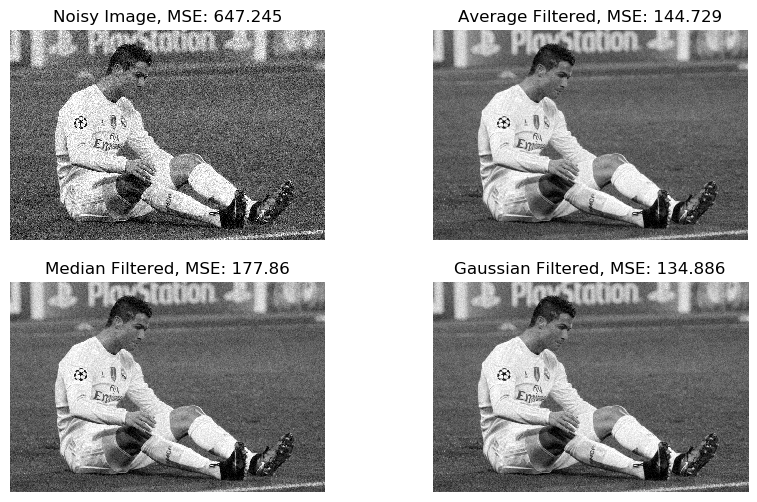

In [76]:
def gaussian_noise(img, mean, sigma):
    max = np.max(img)
    min = np.min(img)
    normalized = (img - min) / (max - min)
    noise = np.random.normal(mean, sigma, img.shape)
    return (normalized + noise) * (max - min) + min

noisy_ronaldo = gaussian_noise(g_ronaldo, 0, 0.1)
avg = myAvgFilter(noisy_ronaldo, 3)
med = myMedFilter(noisy_ronaldo, 3)
gau = myGauFilter(noisy_ronaldo, 3, 1)

fig = plt.figure(figsize=(10, 6))
ax = []
for i in range(4):
    ax.append(fig.add_subplot(2,2,i+1))
    ax[i].axis('off') 
ax[0].title.set_text('Noisy Image, MSE: ' + str(MSE(g_ronaldo, noisy_ronaldo)))
ax[1].title.set_text('Average Filtered, MSE: ' + str(MSE(g_ronaldo, avg)))
ax[2].title.set_text('Median Filtered, MSE: ' + str(MSE(g_ronaldo, med)))
ax[3].title.set_text('Gaussian Filtered, MSE: ' + str(MSE(g_ronaldo, gau)))
ax[0].imshow(noisy_ronaldo, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(avg, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(med, cmap='gray', vmin=0, vmax=255)
ax[3].imshow(gau, cmap='gray', vmin=0, vmax=255)
plt.show()

f) (5 marks) Could “myAvgFilter()” be used for image sharpening? If yes, suggest how? If
not, explain why not? Note: If yes, you do not need to write any code, just a brief
explanation.

**Answer:** I don't believe that the function, as I defined it, can be used for image sharpening. This is because sharpening accentuates separations between intensity levels which is in some sense the opposite process of averaging (which blurs intensities together). However, we could perhaps use the DFT of an average filter in the creation of a Wiener / inverse filter to sharpen images

# Question 3: Band-Pass Filter (25 marks)
The goal of this problem is to implement a band-pass filter using two Gaussian filters in the DFT
domain. The DoG filter (The Difference of Gaussian) is defined as the difference of two
Gaussian kernels with different variances 𝜎1 and 𝜎2. For simplicity, let 𝜎2 = 𝑘 𝜎1 for some k and
subtract the Gaussian kernel with variance 𝜎1 from the kernel with 𝜎2. (Helpful functions:
copyMakeBorder, np.fft.fft2, getGaussianKernel, plot_surface)

a) (10 marks) You need to write a function, “mylinearfilter(image, h)”. This function
should filter an image by pointwise multiplication in the DFT domain with a frequency
response template ‘h’ (Hint: don’t forget to account for the wrap-around effect).

In [77]:
def mylinearfilter(img, h):
    rows = img.shape[0] + h.shape[0] - 1
    cols = img.shape[1] + h.shape[1] - 1
    dft_img = np.fft.fft2(img, (rows, cols))
    dft_h = np.fft.fft2(h, (rows, cols))
    dft = np.multiply(dft_img, dft_h)
    unpad_rows = int((rows - img.shape[0]) / 2)
    unpad_cols = int((cols - img.shape[1]) / 2)
    return np.fft.ifft2(dft)[unpad_rows:-unpad_rows, unpad_cols:-unpad_cols]

b) (10 marks) You need to write a 2d-DoG function, “myDoG(DoGsize, sigma1, k)”. This
function produces a frequency response template of size DoGsize. Use this function to
generate four 2d-DoG filters with 𝜎1 = 1, 2, 3, 4, k = 1.5, and a window size ten times 𝜎1.
Show the 3d illustration of the four 2d-DoG filters in a 2x2 grid with appropriate labels.

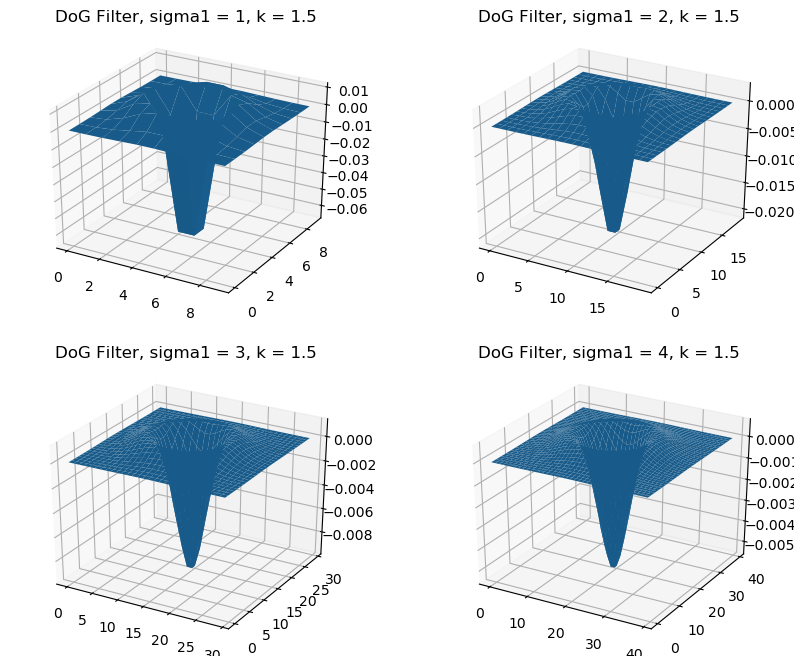

In [78]:
def myDoG(DoGsize, sigma1, k):
    sigma2 = k * sigma1
    square_size = min(DoGsize)
    kernel1 = cv2.getGaussianKernel(square_size, sigma1)
    kernel1 = kernel1 * np.transpose(kernel1)
    kernel2 = cv2.getGaussianKernel(square_size, sigma2)
    kernel2 = kernel2 * np.transpose(kernel2)
    kernel = kernel2 - kernel1
    rows_border = max(0, int((DoGsize[0] - square_size) / 2))
    cols_border = max(0, int((DoGsize[1] - square_size) / 2))
    return cv2.copyMakeBorder(kernel, rows_border, rows_border, cols_border, cols_border, cv2.BORDER_CONSTANT, None, value=0)

filters = [myDoG((sigma1 * 10, sigma1 * 10), sigma1, 1.5) for sigma1 in range(1, 5)]
ranges = [range(sigma1 * 10) for sigma1 in range(1, 5)]

fig = plt.figure(figsize=(10, 8))
for i in range(len(filters)):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    X, Y = np.meshgrid(ranges[i], ranges[i])
    ax.title.set_text('DoG Filter, sigma1 = ' + str(i+1) + ', k = 1.5')
    ax.plot_surface(X, Y, filters[i])

plt.show()  

c) (5 marks) Read in flowers.jpg and convert it to gray-scale. Generate the same four
2d-DoG filters except with the window size equal to the size of flowers.jpg. Use your
“mylinearfilter()” function to filter flower.jpg using the four different filters. Display the
filtered images in a 2x2 grid with the appropriate labels. Write a few lines on what you
observe, and why. Note: The filtered images have both positive and negative responses.
Hint: Make sure image dimensions are odd (Python likes odd window sizes), you can
trim an edge(s) off the image to make the dimensions odd.

**Answer:** In the images below we see the edges of the original flower image. This makes sense since the DoG filter is a band pass filter; we are getting rid of a lot of the higher frequencies which contribute to fine details as well as the lower frequencies which contribute to large portions of similar intensities. This allows us to emphasize most areas in which changes occur, thereby highlighting the edges. We note that as we increase the value of sigma1 (which will increase the size of the band of frequencies we allow) we start to see details more clearly.

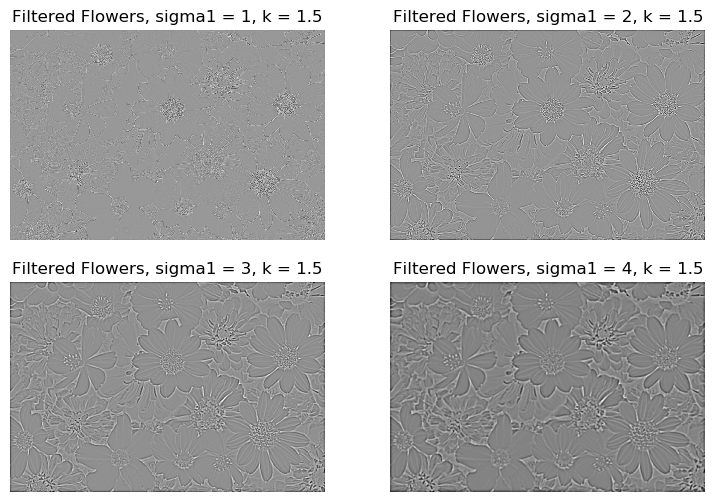

In [79]:
flowers = mpimg.imread('images/q3_flowers.jpg')
g_flowers = grayscale(img=flowers)
# trim an edge
g_flowers = g_flowers[:, 1:]

filters = [myDoG(g_flowers.shape, sigma1, 1.5) for sigma1 in range(1, 5)]
filtered_imgs = [mylinearfilter(g_flowers, filters[i]) for i in range(len(filters))]

fig = plt.figure(figsize=(9, 6))
for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    ax.axis('off') 
    ax.title.set_text('Filtered Flowers, sigma1 = ' + str(i+1) + ', k = 1.5')
    ax.imshow(np.real(filtered_imgs[i]), cmap='gray')
plt.show()